#Unzip Traindata set

In [ ]:
!unzip '/content/TRAIN_SET.zip'

Archive:  /content/TRAIN_SET.zip
   creating: TRAIN_SET/
   creating: TRAIN_SET/APPLES/
  inflating: TRAIN_SET/APPLES/0_100.jpg  
  inflating: TRAIN_SET/APPLES/100_100.jpg  
  inflating: TRAIN_SET/APPLES/101_100.jpg  
  inflating: TRAIN_SET/APPLES/102_100.jpg  
  inflating: TRAIN_SET/APPLES/103_100.jpg  
  inflating: TRAIN_SET/APPLES/104_100.jpg  
  inflating: TRAIN_SET/APPLES/105_100.jpg  
  inflating: TRAIN_SET/APPLES/106_100.jpg  
  inflating: TRAIN_SET/APPLES/107_100.jpg  
  inflating: TRAIN_SET/APPLES/108_100.jpg  
  inflating: TRAIN_SET/APPLES/109_100.jpg  
  inflating: TRAIN_SET/APPLES/10_100.jpg  
  inflating: TRAIN_SET/APPLES/110_100.jpg  
  inflating: TRAIN_SET/APPLES/111_100.jpg  
  inflating: TRAIN_SET/APPLES/112_100.jpg  
  inflating: TRAIN_SET/APPLES/113_100.jpg  
  inflating: TRAIN_SET/APPLES/114_100.jpg  
  inflating: TRAIN_SET/APPLES/115_100.jpg  
  inflating: TRAIN_SET/APPLES/116_100.jpg  
  inflating: TRAIN_SET/APPLES/117_100.jpg  
  inflating: TRAIN_SET/APPLES/118_1

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)

In [ ]:
xtrain = train_datagen.flow_from_directory('/content/TRAIN_SET',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 2626 images belonging to 5 classes.


In [ ]:
!unzip '/content/TEST_SET.zip'

Archive:  /content/TEST_SET.zip
  inflating: TEST_SET/PINEAPPLE/r_230_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_185_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_53_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_234_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_325_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_239_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_49_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_236_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_235_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_320_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_172_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_327_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_231_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_50_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_167_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_174_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_164_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_48_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_52_100.jpg  
  inflating: TEST_SET/PINEAPPLE/r_44_100.jpg  
  inflating: T

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
xtest = test_datagen.flow_from_directory('/content/TEST_SET',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 1055 images belonging to 5 classes.


#CNN Model

In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator

#Initializing the model


In [ ]:
nutrition_model=Sequential()

#Adding CNN layers


In [ ]:
nutrition_model = Sequential()
nutrition_model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3))) 
nutrition_model.add(MaxPooling2D(pool_size=(2,2))) 
nutrition_model.add(Conv2D(32,(3,3),activation='relu'))
nutrition_model.add(MaxPooling2D(pool_size=(2,2))) 
nutrition_model.add(Flatten())

#Adding Dense Layers


In [ ]:
nutrition_model.add(Dense(units=300,activation='relu')) 
nutrition_model.add(Dense(units=150,activation='relu'))
nutrition_model.add(Dense(units=5,activation='softmax'))

In [ ]:
nutrition_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 300)              

In [ ]:
#compiling the model

In [ ]:
nutrition_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Train the model


In [ ]:
nutrition_model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtest,
                    validation_steps=len(xtest))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


27/27 [==============================] - 49s 169ms/step - loss: 0.4586 - accuracy: 0.8355 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 2/10
27/27 [==============================] - 4s 166ms/step - loss: 0.0164 - accuracy: 0.9966 - val_loss: 0.0970 - val_accuracy: 0.9583
Epoch 3/10
27/27 [==============================] - 4s 164ms/step - loss: 0.0037 - accuracy: 0.9996 - val_loss: 0.0307 - val_accuracy: 0.9858
Epoch 4/10
27/27 [==============================] - 4s 165ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.0481 - val_accuracy: 0.9791
Epoch 5/10
27/27 [==============================] - 4s 163ms/step - loss: 2.3015e-04 - accuracy: 1.0000 - val_loss: 0.0652 - val_accuracy: 0.9697
Epoch 6/10
27/27 [==============================] - 4s 165ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0249 - val_accuracy: 0.9886
Epoch 7/10
27/27 [==============================] - 5s 168ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.0691 - val_accuracy: 0.9791
Epoch 8/10
2

#saving the model


In [ ]:
nutrition_model.save('NutritionAnalyser.h5')

#Test the model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [ ]:
#Reading a image
img = image.load_img('/content/TEST_SET/PINEAPPLE/134_100.jpg',target_size=(64,64),grayscale=False)

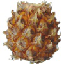

In [ ]:
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)

nutrition_model.predict(x)
xtrain.class_indices


1/1 [==============================] - 0s 17ms/step


{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [ ]:
index = ['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']
pred = np.argmax(nutrition_model.predict(x))
index[pred]

1/1 [==============================] - 0s 17ms/step


'PINEAPPLE'